In [1]:
using Plots, DataFrames, LinearAlgebra, LaTeXStrings, Latexify

## Exercise 1

In [2]:
function second_deriv(u::Function, x, h)
     (u(x + h) + u(x - h) - 2*u(x)) / h^2
end

second_deriv (generic function with 1 method)

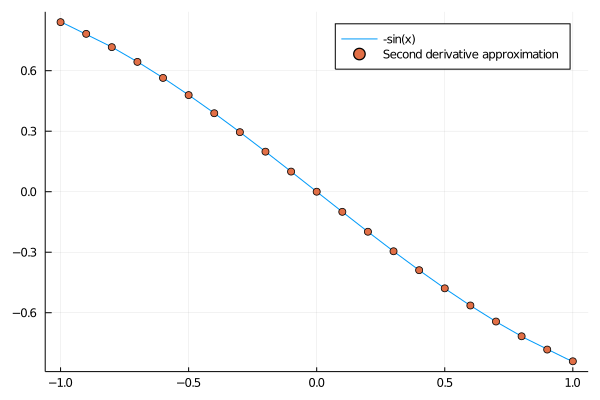

In [3]:
xs = -1:0.1:1
h = 0.1

# We can test our approximation using 
# that second derivative of sin is - sin
sin_xx = [ second_deriv(sin, x, h) for x in xs]

plot(x -> -1*sin(x), -1, 1, label = "-sin(x)")
scatter!(xs, sin_xx, label = "Second derivative approximation")

In [4]:
hs = [10.0^(-k) for k in 1:16]
x = π/6

FDQ = [second_deriv(sin, x, h) for h in hs]
error = abs.(FDQ .+ sin(x)) # True value is -sin(x)

16-element Array{Float64,1}:
   0.00041652780258211175
   4.166652633530443e-6
   4.167449668690537e-8
   3.0387354299499236e-9
   1.1515932100691906e-6
   6.657201129195434e-5
   0.0003996389186794458
   0.6102230246251563
 111.52230246251564
   0.49999999999999994
   0.49999999999999994
   0.49999999999999994
   1.1102230246751564e10
   1.1102230246246565e12
   0.49999999999999994
   1.1102230246251566e16

In [5]:
df1 = DataFrame(h = hs, FDQ = FDQ, Error = error)
latexify(df1)

|         h |                      FDQ |                    Error |
| ---------:| ------------------------:| ------------------------:|
|     $0.1$ |   $-0.49958347219741783$ | $0.00041652780258211175$ |
|    $0.01$ |    $-0.4999958333473664$ |   $4.166652633530443e-6$ |
|   $0.001$ |   $-0.49999995832550326$ |   $4.167449668690537e-8$ |
|  $0.0001$ |    $-0.4999999969612645$ |  $3.0387354299499236e-9$ |
|  $1.0e-5$ |      $-0.50000115159321$ |  $1.1515932100691906e-6$ |
|  $1.0e-6$ |     $-0.499933427988708$ |   $6.657201129195434e-5$ |
|  $1.0e-7$ |    $-0.4996003610813205$ |  $0.0003996389186794458$ |
|  $1.0e-8$ |    $-1.1102230246251563$ |     $0.6102230246251563$ |
|  $1.0e-9$ |     $111.02230246251564$ |     $111.52230246251564$ |
| $1.0e-10$ |                    $0.0$ |    $0.49999999999999994$ |
| $1.0e-11$ |                    $0.0$ |    $0.49999999999999994$ |
| $1.0e-12$ |                    $0.0$ |    $0.49999999999999994$ |
| $1.0e-13$ |  $1.1102230246251564e10$ |  $1.1102230246751564e10$ |
| $1.0e-14$ | $-1.1102230246251565e12$ |  $1.1102230246246565e12$ |
| $1.0e-15$ |                    $0.0$ |    $0.49999999999999994$ |
| $1.0e-16$ | $-1.1102230246251566e16$ |  $1.1102230246251566e16$ |


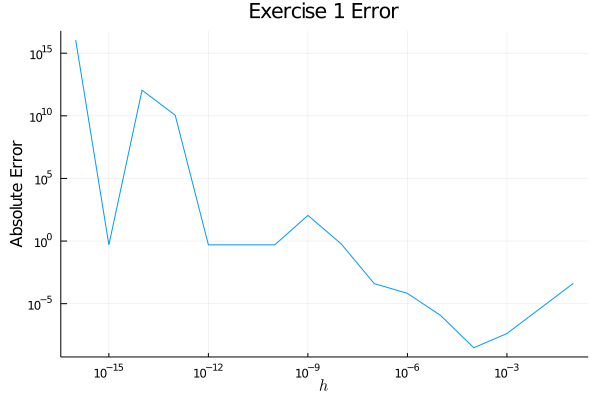

In [6]:
plot(hs, error, scale = :log10,
    label = false,
    xlabel = L"h",
    ylabel = "Absolute Error",
    title = "Exercise 1 Error")

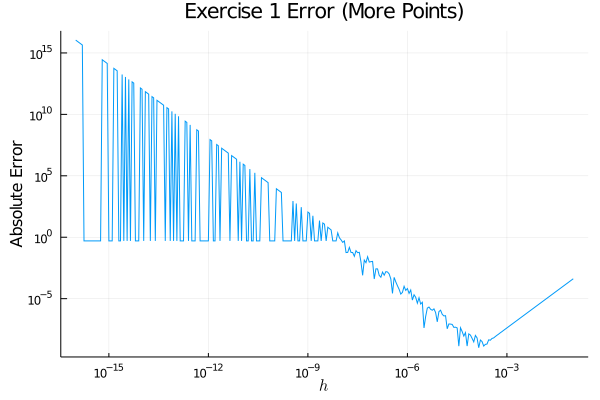

In [7]:
hs = [10.0^(-k) for k in 1:0.05:16]
x = π/6

FDQ = [second_deriv(sin, x, h) for h in hs]
error = abs.(FDQ .+ sin(x)) # True value is -sin(x)

plot(hs, error, scale = :log10,
    label = false,
    xlabel = L"h",
    ylabel = "Absolute Error",
    title = "Exercise 1 Error (More Points)")

There are significant issues once we go smaller than $h \approx 10e-7$

## Exercise 2

In [8]:
function RE(u, x, h, approx, order = 2, t = 2)
    ( t^order * approx(u, x, h / t) - approx(u, x, h) ) / (t^order - 1)
end

RE (generic function with 3 methods)

In [9]:
hs = [0.05, 0.1,0.2]
x = π/6

# No Richardson extrapolation
raw_FDQ = [second_deriv(sin, x, h) for h in hs]
raw_error = raw_FDQ .+ sin(x) # True value is -sin(x)

3-element Array{Float64,1}:
 0.00010415798651314256
 0.00041652780258211175
 0.0016644460310434872

In [10]:
# One step of Richardson extrapolation
RE_1_FDQ = [RE(sin, x, h, second_deriv) for h in hs]
RE_1_error = RE_1_FDQ .+ sin(x) # True value is -sin(x)

3-element Array{Float64,1}:
 2.170097102016655e-9
 3.471449017133921e-8
 5.550597616532649e-7

In [11]:
## RE on the RE
RE_1(u, x, h) = RE(u, x, h, second_deriv)

# Two steps of Richardson extrapolation
RE_2_FDQ = [ RE(sin, x, h, RE_1, 4,2) for h in hs]
RE_2_error = RE_2_FDQ .+ sin(x) # True value is -sin(x)

3-element Array{Float64,1}:
 -5.636047184509607e-13
  4.709010958947601e-13
  2.4805379972292485e-11

In [12]:
df2 = DataFrame(h = hs, 
                NoRE = raw_FDQ, 
                Richardson1 = RE_1_FDQ, 
                Richardson2 = RE_2_FDQ)
df2[1,[3,4]] .= NaN
latexify(df2)

|      h |                   NoRE |           Richardson1 |            Richardson2 |
| ------:| ----------------------:| ---------------------:| ----------------------:|
| $0.05$ |  $-0.4998958420134868$ |                 $NaN$ |                  $NaN$ |
|  $0.1$ | $-0.49958347219741783$ | $-0.4999999652855098$ | $-0.49999999999952904$ |
|  $0.2$ | $-0.49833555396895646$ | $-0.4999994449402383$ | $-0.49999999997519456$ |


In [13]:
df2Errors = DataFrame(h = hs, 
                NoRE_Error = raw_error, 
                Richardson1_Error = RE_1_error, 
                Richardson2_Error = RE_2_error)
df2Errors[1,[3,4]] .= NaN
latexify(df2Errors)

|      h |               NoRE_Error |      Richardson1_Error |        Richardson2_Error |
| ------:| ------------------------:| ----------------------:| ------------------------:|
| $0.05$ | $0.00010415798651314256$ |                  $NaN$ |                    $NaN$ |
|  $0.1$ | $0.00041652780258211175$ | $3.471449017133921e-8$ |  $4.709010958947601e-13$ |
|  $0.2$ |  $0.0016644460310434872$ | $5.550597616532649e-7$ | $2.4805379972292485e-11$ |


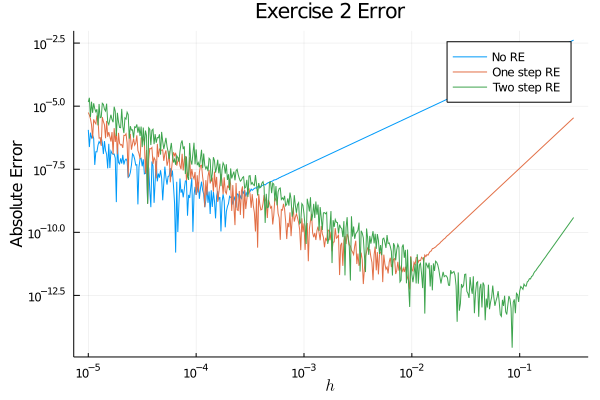

In [14]:
hs = [10.0^(-k) for k in 0.5:0.01:5]

# No Richardson extrapolation
raw_FDQ = [second_deriv(sin, x, h) for h in hs]
raw_error = abs.(raw_FDQ .+ sin(x)) # True value is -sin(x)

# One step of Richardson extrapolation
RE_1_FDQ = [RE(sin, x, h, second_deriv) for h in hs]
RE_1_error = abs.(RE_1_FDQ .+ sin(x)) # True value is -sin(x)

# Two steps of Richardson extrapolation
RE_2_FDQ = [ RE(sin, x, h, RE_1, 4,2) for h in hs]
RE_2_error = abs.(RE_2_FDQ .+ sin(x)) # True value is -sin(x)

plot(hs, raw_error, scale = :log10,
    label = "No RE",
    xlabel = L"h",
    ylabel = "Absolute Error",
    title = "Exercise 2 Error")

plot!(hs, RE_1_error, scale = :log10,
    label = "One step RE")


plot!(hs, RE_2_error, scale = :log10,
    label = "Two step RE")

## Exercise 6

In [15]:
M = 25 # Number of grid points
h  = 1/M # Step size

0.04

In [16]:
## Guess $f$ given a $u$

function make_matrix(M)
   # Step size
   h = 1/M
    
    # Xjs of interest
    xjs = [j*h for j in 1:M]
    
    # Defining diagonal
    diagA = [ -(1 + (xj + h/2)^2) - (1 + (xj - h/2 )^2)  for xj in xjs]
    diagB = [  (1 + (xj + h/2)^2)  for xj in xjs[1:M-1]]
    
    ##Building Matrix
    A = Array(Tridiagonal(diagB, diagA, diagB))
    A[end, [M, M-1, M-2]] .= 3*h/2, -2*h, h/2
    A = A ./ h^2 
    
    return A
end

# Generate MxM approximation
A = make_matrix(M)

25×25 Array{Float64,2}:
 -1252.5     627.25      0.0       0.0   …      0.0       0.0      0.0
   627.25  -1258.5     631.25      0.0          0.0       0.0      0.0
     0.0     631.25  -1268.5     637.25         0.0       0.0      0.0
     0.0       0.0     637.25  -1282.5          0.0       0.0      0.0
     0.0       0.0       0.0     645.25         0.0       0.0      0.0
     0.0       0.0       0.0       0.0   …      0.0       0.0      0.0
     0.0       0.0       0.0       0.0          0.0       0.0      0.0
     0.0       0.0       0.0       0.0          0.0       0.0      0.0
     0.0       0.0       0.0       0.0          0.0       0.0      0.0
     0.0       0.0       0.0       0.0          0.0       0.0      0.0
     0.0       0.0       0.0       0.0   …      0.0       0.0      0.0
     0.0       0.0       0.0       0.0          0.0       0.0      0.0
     0.0       0.0       0.0       0.0          0.0       0.0      0.0
     0.0       0.0       0.0       0.0          0.0  

In [17]:
# Define test function
u(x) = (1 - x)^2

u (generic function with 1 method)

In [18]:
# Define true solution for test function
true_f(x) = 2*(3*x^2 - 2*x + 1)

true_f (generic function with 1 method)

In [19]:
function guess_f(u, M)
    h = 1 / M
    
    # Discretize u
    xjs = [j*h for j in 1:M]
    U = u.(xjs)
    
    # Approximate the F vector
    F_approx = make_matrix(M)*U
    
    # End points will be funky due to boundary conditions
    
    ## First end point has extra term
    F_approx[1] += (1+ (h/2)^2)/h^2
    
    ## Last is a derivative and isn't needed 
    return F_approx[1:(M-1)]
end

f_approx = guess_f(u, M)

24-element Array{Float64,1}:
 1.850400000000036
 1.719199999999546
 1.607199999999807
 1.5144000000001938
 1.44079999999974
 1.3864000000000942
 1.3511999999999489
 1.335200000000043
 1.3383999999999787
 1.3608000000001539
 1.4024
 1.463200000000029
 1.5432000000000414
 1.642400000000066
 1.7607999999999038
 1.8984000000000094
 2.0552000000000845
 2.2311999999999443
 2.426399999999987
 2.640800000000059
 2.8743999999999517
 3.1271999999999984
 3.39920000000002
 3.690399999999985

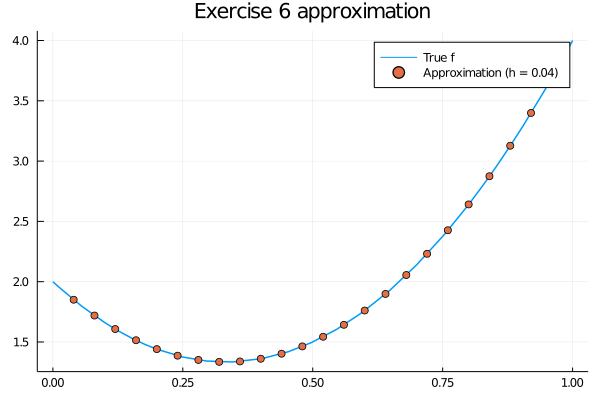

In [20]:
plot(true_f, 0, 1,
    label = "True f",
    linewidth = 1.5)

scatter!([j*h for j in 1:(M-1)],
    f_approx,
    label = "Approximation (h = $h)",
    title = "Exercise 6 approximation")

In [21]:
function get_infinity_error(M)
    # Discretize True Solution
    xjs = [j/M for j in 1:(M-1)]
    true_f_val = true_f.(xjs)
    f_approx = guess_f(u, M)
    
    return maximum( abs.(true_f_val .- f_approx) )
end

get_infinity_error (generic function with 1 method)

In [22]:
get_infinity_error(1000)

5.007842034387977e-7

In [23]:
M_vec = [2^k for k in 2:12]

error_vec = []
for M in M_vec
    push!(error_vec, get_infinity_error(M))
end

Here's a simple attempt to plot the infinity norm error on our approximations. This is difficult to do for very small values of $h$ since the size of the linear system grows as $h$ increases.

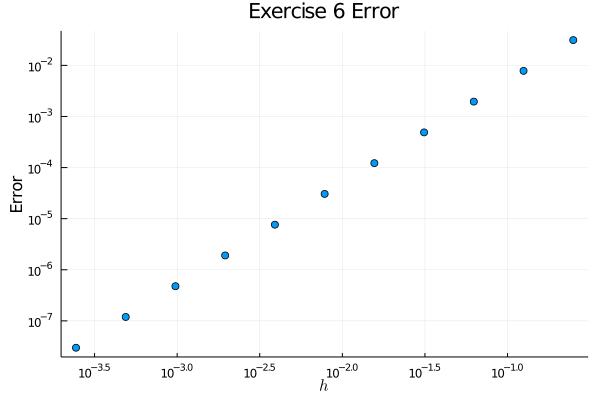

In [24]:
scatter(1 ./ M_vec, error_vec, scale = :log10,
    xlabel = L"h",
    ylabel = "Error",
    title = "Exercise 6 Error",
    label = false)

In [25]:
error_vec

11-element Array{Any,1}:
 0.03125
 0.0078125
 0.001953125
 0.00048828125
 0.0001220703125
 3.0517578125e-5
 7.62939453125e-6
 1.9073486328125e-6
 4.76837158203125e-7
 1.1920928955078125e-7
 2.9802322387695312e-8

In [26]:
1 ./ M_vec

11-element Array{Float64,1}:
 0.25
 0.125
 0.0625
 0.03125
 0.015625
 0.0078125
 0.00390625
 0.001953125
 0.0009765625
 0.00048828125
 0.000244140625